<a href="https://colab.research.google.com/github/Litovecc/Turbo/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
m = 6
k = 5e+3
b = 8
A = 2.5
W = (k/m)**0.5
fi = np.pi
g=9.8


In [4]:
x0, vo, = 0.2, 0.3
tn = 5
n = int(1e+4)

In [5]:
def right_side_odu(xi, vi):
  f1 = vi
  f2 = -g - k/m *xi - b/m *vi
  return f1, f2


In [6]:
# Расчет значений перемещения и скорости методов рунге-Кутта 4-го порядка точности, где М[i,0] - для фукции x(t)

def solver_odu_rk(x0,v0,tn,n):
  T, dt = np.linspace(0, tn,n, retstep = True)
  M = np.zeros((4,2))
  X = np.zeros(n)
  V = np.zeros(n)
  X[0] = x0
  V[0] = v0
  for i in range(n-1):
    M[0,0], M[0,1] = right_side_odu(X[i],V[i])
    M[1,0], M[1,1] = right_side_odu(X[i] + dt/2 * M[0,0], V[i]+dt/2 * M[0,1])
    M[2,0], M[2,1] = right_side_odu(X[i] + dt/2 * M[1,0], V[i]+dt/2 * M[1,1])
    M[3,0], M[3,1] = right_side_odu(X[i] + dt * M[2,0], V[i]+dt * M[2,1])

    X[i+1] = X[i] +dt*(M[0,0]+ 2*M[1,0] + 2*M[2,0]+ M[3,0])/6
    V[i+1] = V[i] + dt *(M[0,1]+ 2*M[1,1] + 2*M[2,1]+ M[3,1])/6
  return T, X, V

In [7]:
T,X,V = solver_odu_rk(x0, vo, tn, n)

Text(0, 0.5, 'v(t) n/s')

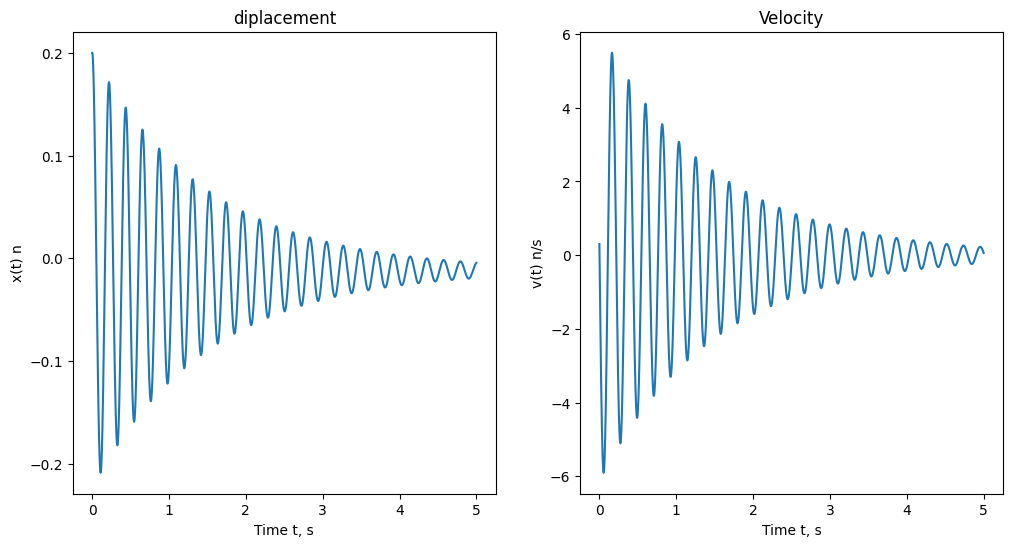

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(T,X)
plt.title('diplacement')
plt.xlabel('Time t, s')
plt.ylabel('x(t) n')

plt.subplot(1,2,2)
plt.plot(T,V)
plt.title('Velocity')
plt.xlabel('Time t, s')
plt.ylabel('v(t) n/s')